In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df = pd.read_csv('employee.csv')
df

name   age   income gender  department grade  performance_score
0    Allen Smith  45.0      NaN    NaN  Operations    G3                723
1        S Kumar   NaN  16000.0      F     Finance    G0                520
2    Jack Morgan  32.0  35000.0      M     Finance    G2                674
3      Ying Chin  45.0  65000.0      F       Sales    G3                556
4  Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
5  Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
6   James Authur  54.0      NaN      F  Operations    G3                 53
7     Josh Wills  54.0  52000.0      F     Finance    G3                901
8       Leo Duck  23.0  98000.0      M       Sales    G4                709

In [3]:
df.shape

(9, 7)

In [4]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [5]:
df.describe()

age        income  performance_score
count   7.000000      7.000000           9.000000
mean   40.428571  52857.142857         610.666667
std    12.204605  26028.372797         235.671912
min    23.000000  16000.000000          53.000000
25%    31.000000  38500.000000         556.000000
50%    45.000000  52000.000000         674.000000
75%    49.500000  63500.000000         711.000000
max    54.000000  98000.000000         901.000000

In [6]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name"

In [8]:
df = df.set_index('name')
df

age   income gender  department grade  performance_score
name                                                                    
Allen Smith    45.0      NaN    NaN  Operations    G3                723
S Kumar         NaN  16000.0      F     Finance    G0                520
Jack Morgan    32.0  35000.0      M     Finance    G2                674
Ying Chin      45.0  65000.0      F       Sales    G3                556
Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
Satyam Sharma   NaN  62000.0    NaN       Sales    G3                649
James Authur   54.0      NaN      F  Operations    G3                 53
Josh Wills     54.0  52000.0      F     Finance    G3                901
Leo Duck       23.0  98000.0      M       Sales    G4                709

# 3. Select rows for specific names Jack Morgan and Josh wills.

In [9]:
df.loc[['Jack Morgan', 'Josh Wills']]

age   income gender department grade  performance_score
name                                                                 
Jack Morgan  32.0  35000.0      M    Finance    G2                674
Josh Wills   54.0  52000.0      F    Finance    G3                901

# 4. Select data for multiple values "Sales" and “Finance”.

### Sales

In [10]:
sandfin = df.loc[df['department'].isin(['Sales', 'Finance'])]
sandfin

age   income gender department grade  performance_score
name                                                                   
S Kumar         NaN  16000.0      F    Finance    G0                520
Jack Morgan    32.0  35000.0      M    Finance    G2                674
Ying Chin      45.0  65000.0      F      Sales    G3                556
Satyam Sharma   NaN  62000.0    NaN      Sales    G3                649
Josh Wills     54.0  52000.0      F    Finance    G3                901
Leo Duck       23.0  98000.0      M      Sales    G4                709

# 5. Display employee who has more than 700 performance score

In [11]:
per_score = df.loc[df['performance_score'] > 700]
per_score

age   income gender  department grade  performance_score
name                                                                    
Allen Smith    45.0      NaN    NaN  Operations    G3                723
Dheeraj Patel  30.0  42000.0      F  Operations    G2                711
Josh Wills     54.0  52000.0      F     Finance    G3                901
Leo Duck       23.0  98000.0      M       Sales    G4                709

# 6. Display employee who has more than 500 and less than 700 performance score

In [12]:
per_score2 = df[(df['performance_score'] > 500) & (df['performance_score'] < 700)] 
per_score2

age   income gender department grade  performance_score
name                                                                   
S Kumar         NaN  16000.0      F    Finance    G0                520
Jack Morgan    32.0  35000.0      M    Finance    G2                674
Ying Chin      45.0  65000.0      F      Sales    G3                556
Satyam Sharma   NaN  62000.0    NaN      Sales    G3                649

# 7. Check and handle missing values in the dataset.

In [13]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

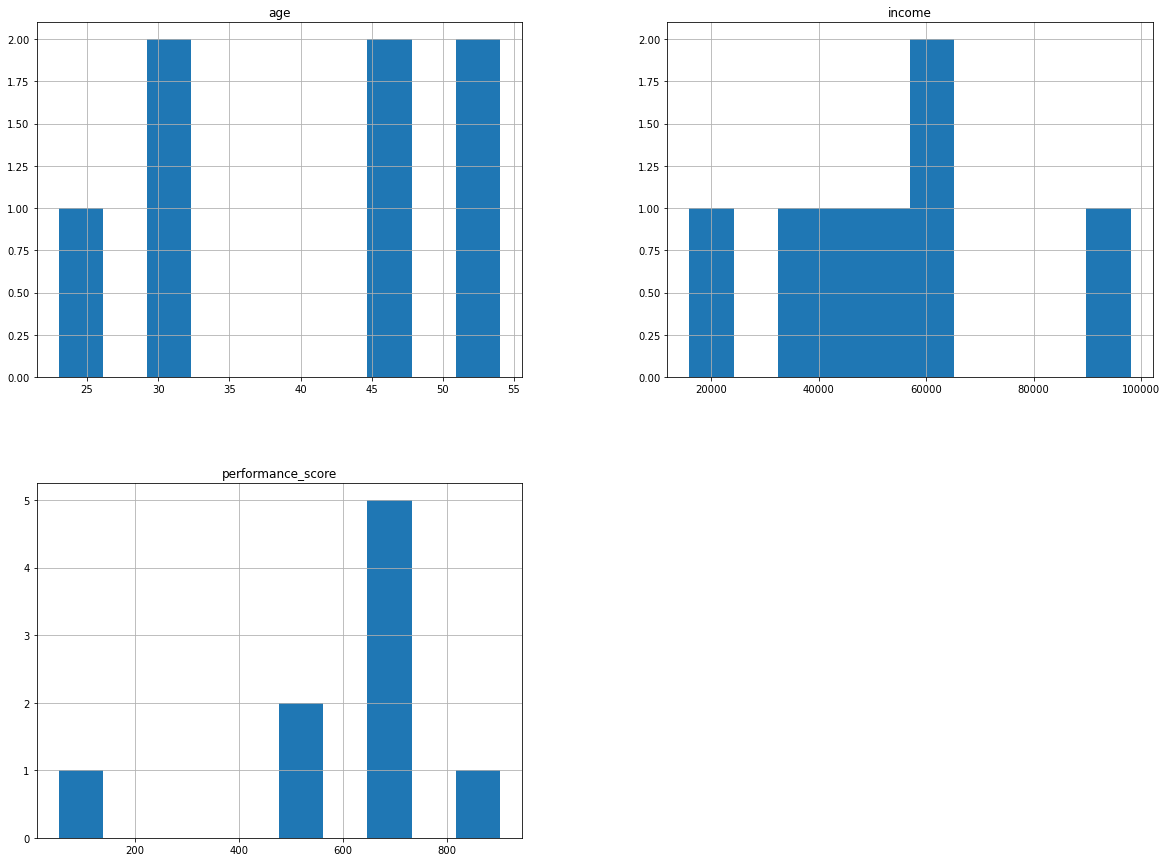

In [14]:
freq_graph = df.select_dtypes(include =['float', 'int64'])
freq_graph.hist(figsize = (20,15))
plt.show()

In [15]:
df.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [16]:
for each in ['age', 'income']:
    df[each] = df[each].fillna(df[each].median())

In [17]:
df['gender'] = df['gender'].fillna('unknown')

In [18]:
df

age   income   gender  department grade  performance_score
name                                                                      
Allen Smith    45.0  52000.0  unknown  Operations    G3                723
S Kumar        45.0  16000.0        F     Finance    G0                520
Jack Morgan    32.0  35000.0        M     Finance    G2                674
Ying Chin      45.0  65000.0        F       Sales    G3                556
Dheeraj Patel  30.0  42000.0        F  Operations    G2                711
Satyam Sharma  45.0  62000.0  unknown       Sales    G3                649
James Authur   54.0  52000.0        F  Operations    G3                 53
Josh Wills     54.0  52000.0        F     Finance    G3                901
Leo Duck       23.0  98000.0        M       Sales    G4                709

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [19]:
df

age   income   gender  department grade  performance_score
name                                                                      
Allen Smith    45.0  52000.0  unknown  Operations    G3                723
S Kumar        45.0  16000.0        F     Finance    G0                520
Jack Morgan    32.0  35000.0        M     Finance    G2                674
Ying Chin      45.0  65000.0        F       Sales    G3                556
Dheeraj Patel  30.0  42000.0        F  Operations    G2                711
Satyam Sharma  45.0  62000.0  unknown       Sales    G3                649
James Authur   54.0  52000.0        F  Operations    G3                 53
Josh Wills     54.0  52000.0        F     Finance    G3                901
Leo Duck       23.0  98000.0        M       Sales    G4                709

Text(0.5, 1.0, 'performance score box plot')

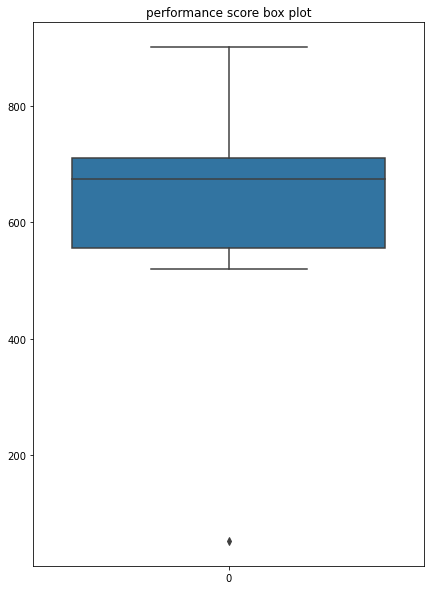

In [20]:
plt.figure(figsize = (7, 10))
sns.boxplot(data = df['performance_score'])
plt.title('performance score box plot')

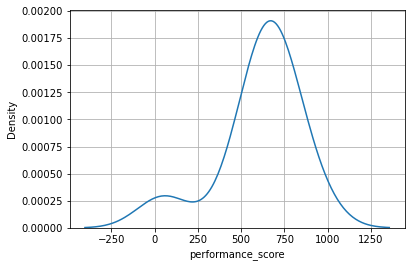

In [21]:
sns.kdeplot(df['performance_score'])
plt.grid()

In [22]:
df['performance_score'].skew()

-1.7947713470359914

In [23]:
Q1 = np.percentile(df["performance_score"],25)
Q2 = np.percentile(df["performance_score"],50)
Q3 = np.percentile(df["performance_score"],75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print('Upper limit-', upper_limit, '\nLower Limit-', lower_limit)
outlier = list()
for each in df["performance_score"]:
    if (each < lower_limit) or (each > upper_limit):
        outlier.append(each)
print('\nThe outliers -',outlier)

index_dropped = df[(df["performance_score"] < lower_limit) | (df["performance_score"] > upper_limit)].index
df.drop(index_dropped,inplace=True)
df

Upper limit- 943.5 
Lower Limit- 323.5

The outliers - [53]


age   income   gender  department grade  performance_score
name                                                                      
Allen Smith    45.0  52000.0  unknown  Operations    G3                723
S Kumar        45.0  16000.0        F     Finance    G0                520
Jack Morgan    32.0  35000.0        M     Finance    G2                674
Ying Chin      45.0  65000.0        F       Sales    G3                556
Dheeraj Patel  30.0  42000.0        F  Operations    G2                711
Satyam Sharma  45.0  62000.0  unknown       Sales    G3                649
Josh Wills     54.0  52000.0        F     Finance    G3                901
Leo Duck       23.0  98000.0        M       Sales    G4                709

# 9. Check the gender column and do Dummy encoding

In [24]:
df_dummy = pd.get_dummies(df, columns=['gender'])
df_dummy

age   income  department grade  performance_score  gender_F  \
name                                                                          
Allen Smith    45.0  52000.0  Operations    G3                723         0   
S Kumar        45.0  16000.0     Finance    G0                520         1   
Jack Morgan    32.0  35000.0     Finance    G2                674         0   
Ying Chin      45.0  65000.0       Sales    G3                556         1   
Dheeraj Patel  30.0  42000.0  Operations    G2                711         1   
Satyam Sharma  45.0  62000.0       Sales    G3                649         0   
Josh Wills     54.0  52000.0     Finance    G3                901         1   
Leo Duck       23.0  98000.0       Sales    G4                709         0   

               gender_M  gender_unknown  
name                                     
Allen Smith           0               1  
S Kumar               0               0  
Jack Morgan           1               0  
Ying Chin             0               0  
Dheeraj Patel         0               0  
Satyam Sharma         0               1  
Josh Wills            0               0  
Leo Duck              1               0

# 10.Do the standard scaling on the feature performance score

In [30]:
sc=StandardScaler()
col=['performance_score']
feature=df[col]
scaler=sc.fit(feature.values)
feature=scaler.transform(feature.values)
df[col]=feature
df

age   income   gender  department grade  performance_score
name                                                                      
Allen Smith    45.0  52000.0  unknown  Operations    G3           0.392262
S Kumar        45.0  16000.0        F     Finance    G0          -1.475872
Jack Morgan    32.0  35000.0        M     Finance    G2          -0.058667
Ying Chin      45.0  65000.0        F       Sales    G3          -1.144578
Dheeraj Patel  30.0  42000.0        F  Operations    G2           0.281831
Satyam Sharma  45.0  62000.0  unknown       Sales    G3          -0.288733
Josh Wills     54.0  52000.0        F     Finance    G3           2.030331
Leo Duck       23.0  98000.0        M       Sales    G4           0.263425